# Stock Market Overview

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')




In [182]:
from yahoo_fin.stock_info import *
from yahoo_fin import stock_info as si
from datetime import date, timedelta
import requests
import numpy as np
import warnings
import pandas_datareader as web
from yahoofinancials import YahooFinancials
warnings.filterwarnings('ignore')
today = str(date.today())


In [6]:
cad_us = web.get_data_fred('DEXCAUS', start_dt, end_dt)
cny_us = web.get_data_fred('DEXCHUS', start_dt, end_dt)
cny_cad = cny_us['DEXCHUS']/cad_us['DEXCAUS']
cny_cad

DATE
2021-10-25    5.160915
2021-10-26    5.151760
2021-10-27    5.180757
2021-10-28    5.176304
2021-10-29    5.166573
2021-11-01    5.177823
2021-11-02    5.152576
2021-11-03    5.159552
2021-11-04    5.133205
2021-11-05    5.141973
2021-11-08    5.136404
2021-11-09    5.130930
2021-11-10    5.132321
2021-11-11         NaN
2021-11-12    5.079392
2021-11-15    5.099800
2021-11-16    5.088282
2021-11-17    5.063919
2021-11-18    5.055903
2021-11-19    5.056053
dtype: float64

In [183]:
start_dt = str(date.today()- timedelta(days=365))
end_dt = str(date.today())

SP_TSX = get_data("^GSPTSE", start_date = start_dt, end_date = end_dt)
SP500 = get_data("^GSPC", start_date = start_dt, end_date = end_dt)
DOWJ = get_data("^DJI", start_date = start_dt, end_date = end_dt)
NASDAQ = get_data("^IXIC", start_date = start_dt, end_date = end_dt)
VIX = get_data("^VIX", start_date = start_dt, end_date = end_dt)
NIKKEI = get_data("^N225", start_date = start_dt, end_date = end_dt)
HANGSENG = get_data("^HSI", start_date = start_dt, end_date = end_dt)
SHANGHAI = get_data("000001.SS", start_date = start_dt, end_date = end_dt)

financial_index_smr = pd.DataFrame({"SP_TSX": SP_TSX["adjclose"],
                      "SP500": SP500["adjclose"],
                      "DOWJ": DOWJ["adjclose"],
                      "NASDAQ": NASDAQ["adjclose"],
                      "NIKKEI": NIKKEI["adjclose"],
                      "HANGSENG": HANGSENG["adjclose"],
                      "SHANGHAI": SHANGHAI["adjclose"],
                      "VIX": VIX["adjclose"]})
financial_index_smr = financial_index_smr.fillna(method='ffill').reset_index()
financial_index_smr

,index,SP_TSX,SP500,DOWJ,NASDAQ,NIKKEI,HANGSENG,SHANGHAI,VIX
0,2020-11-24,17274.300781,3635.409912,30046.240234,12036.790039,26165.589844,26588.199219,3402.822998,21.639999
1,2020-11-25,17313.099609,3629.649902,29872.470703,12094.400391,26296.859375,26669.750000,3362.326904,21.250000
2,2020-11-26,17351.300781,3629.649902,29872.470703,12094.400391,26537.310547,26819.449219,3369.732910,21.250000
3,2020-11-27,17396.599609,3638.350098,29910.369141,12205.849609,26644.710938,26894.679688,3408.306885,20.840000
4,2020-11-30,17190.300781,3621.629883,29638.640625,12198.740234,26433.619141,26341.490234,3391.760010,20.570000
...,...,...,...,...,...,...,...,...,...
256,2021-11-18,21637.500000,4704.540039,35870.949219,15993.709961,29598.660156,25319.720703,3520.709961,17.590000
257,2021-11-19,21555.000000,4697.959961,35601.980469,16057.440430,29745.869141,25049.970703,3560.370117,17.910000
258,2021-11-22,21420.800781,4682.939941,35619.250000,15854.759766,29774.109375,24951.339844,3582.080078,19.170000
259,2021-11-23,21453.800781,4690.700195,35813.800781,15775.139648,29774.109375,24651.580078,3589.089111,19.379999


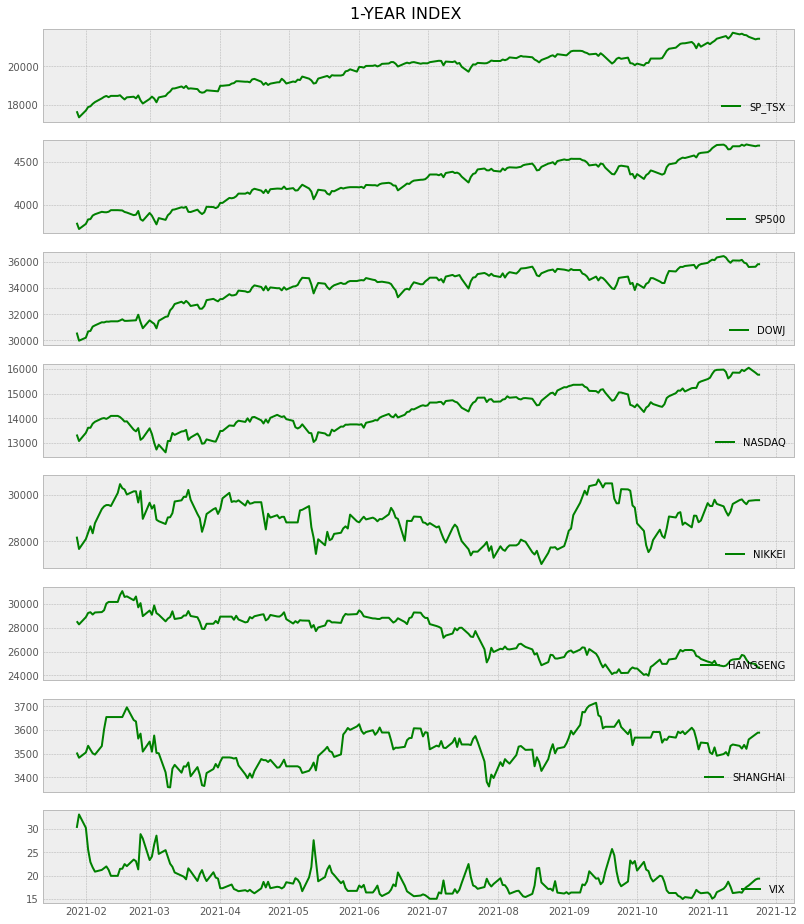

In [152]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (12,15)

fin_index = financial_index_smr.columns[1:].values
fig, axs = plt.subplots(len(fin_index), sharex=True, sharey=False)
fig.suptitle('1-YEAR INDEX', fontsize=16, y=0.9)
for i in range(len(fin_index)):
    axs[i].plot(financial_index_smr['index'], financial_index_smr[fin_index[i]], label = fin_index[i], color='green')
    axs[i].legend(fontsize=10, frameon=False, loc = 'lower right')


In [ ]:
plt.rcParams["figure.figsize"] = (18,12)
numrow = int(len(fin_index)/2)
fig, axs = plt.subplots(nrows=numrow, ncols=2, sharex=True, sharey=False)
fig.suptitle('1-YEAR INDEX', fontsize=16, y=0.9)
for i in range(numrow):
    for j in range(2):
        axs[i,j].plot(financial_index_smr['index'], 
                      financial_index_smr[fin_index[i*2+j]], 
                      label = fin_index[i*2+j], 
                      color='green')
        axs[i,j].legend(fontsize=10, frameon=False, loc = 'lower right')


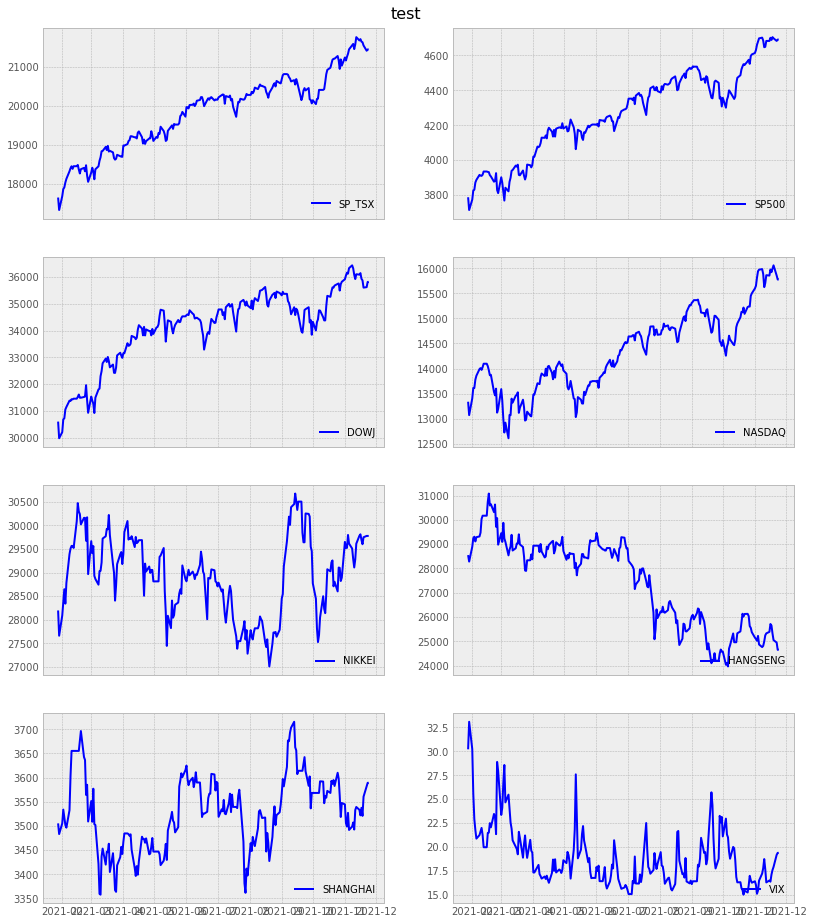

In [171]:
plt.rcParams["figure.figsize"] = (18,12)
numrow = int(len(fin_index)/2)
fig, axs = plt.subplots(nrows=numrow, ncols=2, sharex=True, sharey=False)
recent_financial_index_smr = financial_index_smr.tail(7)
fig.suptitle('1-WEEK INDEX', fontsize=16, y=0.9)
for i in range(numrow):
    for j in range(2):
        axs[i,j].plot(recent_financial_index_smr['index'], 
                      recent_financial_index_smr[fin_index[i*2+j]], 
                      label = fin_index[i*2+j], 
                      color='blue')
        axs[i,j].legend(fontsize=10, frameon=False, loc = 'lower right')


In [170]:
def plot_subplot(data, x_var, title, color = 'blue'):
    plt.rcParams["figure.figsize"] = (12,15)
    fin_index = data.columns.values.tolist()
    fin_index.remove(x_var)
    numrow = int(len(fin_index)/2)
    fig, axs = plt.subplots(nrows=numrow, ncols=2, sharex=True, sharey=False)
    fig.suptitle(title, fontsize=16, y=0.9)
    for i in range(numrow):
        for j in range(2):
            axs[i,j].plot(data[x_var], 
                          data[fin_index[i*2+j]], 
                          label = fin_index[i*2+j], 
                          color = color)
            axs[i,j].legend(fontsize=10, frameon=False, loc = 'lower right')
    

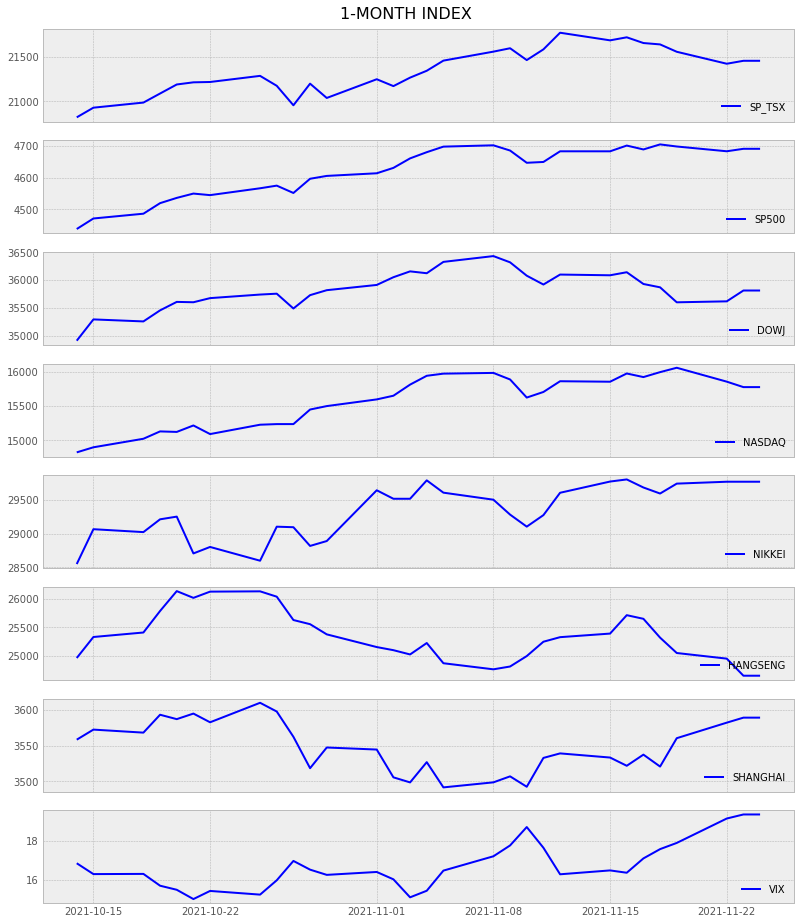

In [153]:
fig, axs = plt.subplots(len(fin_index), sharex=True, sharey=False)
recent_financial_index_smr = financial_index_smr.tail(30)
fig.suptitle('1-MONTH INDEX', fontsize=16, y=0.9)
for i in range(len(fin_index)):
    axs[i].plot(recent_financial_index_smr['index'], recent_financial_index_smr[fin_index[i]], label = fin_index[i], color='blue')
    axs[i].legend(fontsize=10, frameon=False, loc = 'lower right')


In [184]:
# from yahoofinancials import YahooFinancials
commodity_futures = ['GC=F', 'SI=F', 'CL=F', '^TNX', 'CAD=X', 'CADCNY=X']
index_map = {
    'GC=F': 'Gold', 
    'SI=F': 'Silver', 
    'CL=F': 'Crude Oil',
    '^TNX': 'CBOE 10Y Bond',
    'CAD=X': 'USD/CAD',
    'CADCNY=X': 'CAD/CNY'
}
yahoo_financials_commodities = YahooFinancials(commodity_futures)
daily_commodity_prices = yahoo_financials_commodities.get_historical_price_data(start_dt, end_dt, 'daily')
product = []
date = []
price = []
for i in daily_commodity_prices:
    for j in daily_commodity_prices[i]['prices']:
        product.append(index_map[i])
        date.append(j['formatted_date'])
        price.append(j['adjclose'])

product_smr = pd.DataFrame(
    {'Product': product,
     'Date': date,
     'Price': price
    })
product_smr


,Product,Date,Price
0,Gold,2020-11-24,1804.800049
1,Gold,2020-11-25,1805.699951
2,Gold,2020-11-27,NaN
3,Gold,2020-11-30,1775.699951
4,Gold,2020-12-01,1814.099976
...,...,...,...
1579,CAD/CNY,2021-11-18,5.054645
1580,CAD/CNY,2021-11-19,5.061098
1581,CAD/CNY,2021-11-22,5.047669
1582,CAD/CNY,2021-11-23,5.020065


In [190]:
from datetime import datetime, date, timedelta
test = product_smr.pivot_table(index=["Date"], 
                    columns='Product', 
                    values='Price')
test = test.reset_index()
test = test.fillna(method='ffill')
test['Date'] = test['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
test

Product,Date,CAD/CNY,CBOE 10Y Bond,Crude Oil,Gold,Silver,USD/CAD
0,2020-11-24,5.032483,0.882,44.910000,1804.800049,23.292000,1.30744
1,2020-11-25,5.065077,0.878,45.709999,1805.699951,23.356001,1.29964
2,2020-11-26,5.052722,0.878,45.709999,1805.699951,23.356001,1.30020
3,2020-11-27,5.043069,0.878,45.709999,1805.699951,23.356001,1.30204
4,2020-11-30,5.055976,0.844,45.340000,1775.699951,22.534000,1.29826
...,...,...,...,...,...,...,...
287,2021-11-18,5.054645,1.589,79.010002,1861.000000,24.900999,1.26112
288,2021-11-19,5.061098,1.536,76.099998,1851.199951,24.780001,1.26035
289,2021-11-22,5.047669,1.625,76.750000,1806.000000,24.297001,1.26535
290,2021-11-23,5.020065,1.667,78.500000,1783.500000,23.434999,1.27013


In [187]:
test.dtypes

Product
Date              object
CAD/CNY          float64
CBOE 10Y Bond    float64
Crude Oil        float64
Gold             float64
Silver           float64
USD/CAD          float64
dtype: object

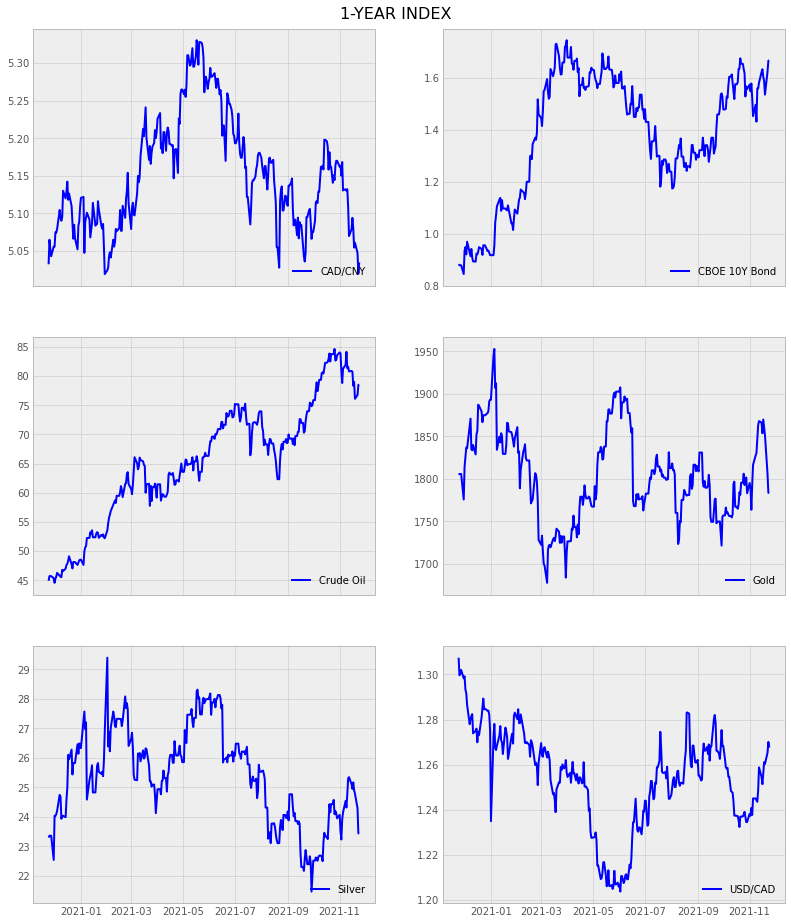

In [191]:
plot_subplot(test, 'Date', '1-YEAR INDEX', color = 'blue')

In [161]:
index_map = {
    'GC=F': 'Gold', 
    'SI=F': 'Silver', 
    'CL=F': 'Crude Oil',
    '^TNX': 'CBOE 10Y Bond',
    'CAD=X': 'USD/CAD',
    'CADCNY=X': 'CAD/CNY'
}
product = []
date = []
price = []
for i in daily_commodity_prices:
#     print(i)
#     print(daily_commodity_prices[i]['prices'])
    for j in daily_commodity_prices[i]['prices']:
        product.append(index_map[i])
        date.append(j['formatted_date'])
        price.append(j['adjclose'])

product_smr = pd.DataFrame(
    {'Product': product,
     'Date': date,
     'Price': price
    })
#         print('--')
#         print(index_map[i])
#         print(j['formatted_date'])
#         print(j['adjclose'])      
product_smr

,Product,Date,Price
0,Gold,2021-01-28,1837.900024
1,Gold,2021-01-29,1847.300049
2,Gold,2021-02-01,1860.800049
3,Gold,2021-02-02,1830.500000
4,Gold,2021-02-03,1832.199951
...,...,...,...
1304,CAD/CNY,2021-11-18,5.054645
1305,CAD/CNY,2021-11-19,5.061098
1306,CAD/CNY,2021-11-22,5.047669
1307,CAD/CNY,2021-11-23,5.020065


In [127]:
test = si.get_day_most_active()
test.columns = ['Symbol','Name','Price','Change','Change_pct','Volume','Avg_vol','Market_Cap','PE_Ratio']
test = test[['Symbol','Change_pct','Market_Cap']].head(20)
test

import decimal
def format_cap(x):
    pre_format = str(x).replace('T','e+12')
    aft_format = "{:.0f}".format(decimal.Decimal(pre_format))
    return int(aft_format)
    
test['Market_Cap']=test['Market_Cap'].apply(lambda x: format_cap(x))
test 

In [107]:
def two_dim_heatmap(data, symbol, index1, index2, symbol_name):
    """
    data: dataset to include 3 columns: symbol, index1, index2
    symbol: variables to be analyzed
    index1: numeric value, heatmap 1
    index2: numeric value, heatmap 2
    symbol_name: the name of variable symbol shown on the plot
    REFERENCE: https://www.tutorialguruji.com/python/how-to-create-a-heatmap-for-2-columns-at-2-different-scales-in-python/
    """
    fig, ax = plt.subplots()
    N = data.index.size

    # first heatmap
    im1 = ax.imshow(np.vstack([data[index1],data[index1]]).T, 
                    aspect='auto', extent=[-0.5,0.5,-0.5,N-0.5], origin='lower', cmap='magma')
    # second heatmap
    im2 = ax.imshow(np.vstack([data[index2],data[index2]]).T, 
                    aspect='auto', extent=[0.5,1.5,-0.5,N-0.5], origin='lower', cmap='Blues')

    cbar1 = fig.colorbar(im1, ax=ax, label=index1)
    cbar2 = fig.colorbar(im2, ax=ax, label=index2)


    ax.set_xlim(-0.5,1.5)
    ax.set_xticks([0,1])
    ax.set_xticklabels([index1,index2])
    ax.set_yticks(range(N))
    ax.set_yticklabels(data[symbol])
    ax.set_ylabel(symbol_name)
    fig.tight_layout()
    plt.show()

TypeError: string indices must be integers